# Data Analysis

In [1]:
# enable auto reload
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src.utils.data_utils import CWRUDataset
train_dataset = CWRUDataset('./data','train',p=1)
test_dataset = CWRUDataset('./data','test',p=1)

train dataset size:14950, labeled:14950, unlabeled:0
masks : [0:1495, 1:1495, 2:1495, 3:1495, 4:1495, 5:1495, 6:1495, 7:1495, 8:1495, 9:1495]
test dataset size:3760, labeled:3760, unlabeled:0
masks : [0:376, 1:376, 2:376, 3:376, 4:376, 5:376, 6:376, 7:376, 8:376, 9:376]


In [4]:
from torch.utils.data import DataLoader
temp_loader = DataLoader(train_dataset, shuffle=True, batch_size=1)

Data shape :  torch.Size([1, 1, 2048])
Ground-truth label :  1
Mask(labeled/unlabeled) :  True


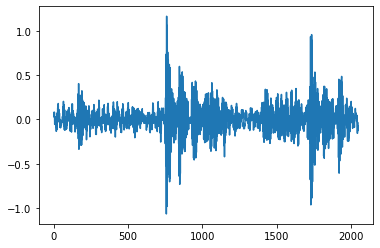

In [5]:
for X,y,M in temp_loader:
    print('Data shape : ',X.shape)
    print('Ground-truth label : ', y.item())
    print('Mask(labeled/unlabeled) : ', M.item())
    plt.plot(X.reshape(-1))
    break
plt.show()

Data shape :  torch.Size([1, 1, 2048])
Ground-truth label :  0
Mask(labeled/unlabeled) :  True


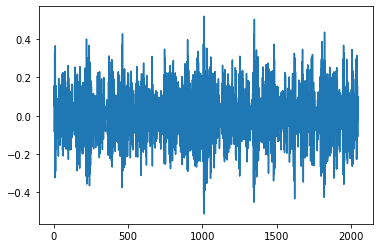

In [6]:
for X,y,M in temp_loader:
    if y != 0:
        continue

    print('Data shape : ',X.shape)
    print('Ground-truth label : ', y.item())
    print('Mask(labeled/unlabeled) : ', M.item())
    plt.plot(X.reshape(-1))
    break
plt.show()

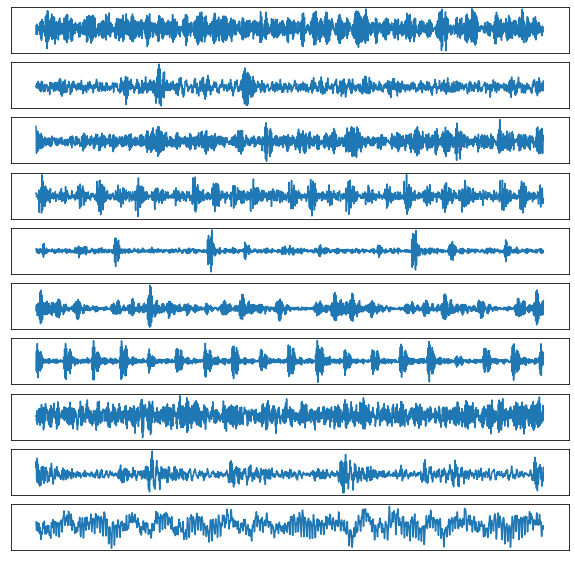

In [7]:
Xs = [False]*10
fig=plt.figure(figsize=(10,10))
for X,y,M in temp_loader:
    if not Xs[y]:
        Xs[y]=True
        ax = plt.subplot(10,1,y.item()+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.plot(X.reshape(-1))
    if sum(Xs) >= 10:
        break
plt.show()

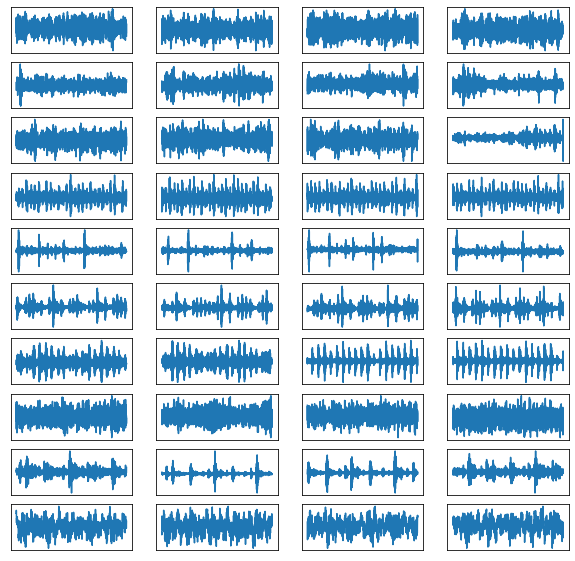

In [8]:
N=4

Xs = [0]*10
fig=plt.figure(figsize=(10,10))
for X,y,M in temp_loader:
    if Xs[y] < N:
        Xs[y] += 1
        ax = plt.subplot(10,N,N*y.item()+Xs[y])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.plot(X.reshape(-1))
    if sum(Xs) >= N*10:
        break
plt.show()